In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
house=pd.read_csv("/content/drive/MyDrive/project_iitd/house_price.csv")

In [ ]:
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
18560,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
18561,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
18562,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
18563,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [15]:
count_nan_rows = house.isnull().any(axis=1).sum()
print("Number of rows with missing values:", count_nan_rows)

Number of rows with missing values: 189


In [16]:
y=house.iloc[:,8].values
y

array([452600, 358500, 342200, ...,  92300,  84700,  89400])

In [17]:
house=house.drop('median_house_value', axis=1)
x=house.iloc[:,:10].values
x


array([[-122.23, 37.88, 41, ..., 126, 8.3252, 'NEAR BAY'],
       [-122.22, 37.86, 21, ..., 1138, 8.3014, 'NEAR BAY'],
       [-122.25, 37.85, 52, ..., 259, 3.8462, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17, ..., 433, 1.7, 'INLAND'],
       [-121.32, 39.43, 18, ..., 349, 1.8672, 'INLAND'],
       [-121.24, 39.37, 16, ..., 530, 2.3886, 'INLAND']], dtype=object)

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([("ocean_proximity", OneHotEncoder(),[-1])], remainder="passthrough")
x_new = ct.fit_transform(x)
x_new

array([[0.0, 0.0, 0.0, ..., 322, 126, 8.3252],
       [0.0, 0.0, 0.0, ..., 2401, 1138, 8.3014],
       [0.0, 0.0, 0.0, ..., 565, 259, 3.8462],
       ...,
       [0.0, 1.0, 0.0, ..., 1007, 433, 1.7],
       [0.0, 1.0, 0.0, ..., 741, 349, 1.8672],
       [0.0, 1.0, 0.0, ..., 1387, 530, 2.3886]], dtype=object)

In [19]:
from sklearn.impute import KNNImputer
x_df = pd.DataFrame(x_new)

#Apply KNNImputer
imputer = KNNImputer(n_neighbors=5)
x_imputed = imputer.fit_transform(x_df)
x_imputed

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.2200e+02, 1.2600e+02,
        8.3252e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.4010e+03, 1.1380e+03,
        8.3014e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 5.6500e+02, 2.5900e+02,
        3.8462e+00],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0070e+03, 4.3300e+02,
        1.7000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 7.4100e+02, 3.4900e+02,
        1.8672e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.3870e+03, 5.3000e+02,
        2.3886e+00]])

In [20]:
import numpy as np
nan_count = np.isnan(x_imputed).sum()
print("Total missing (NaN) values:", nan_count)

Total missing (NaN) values: 0


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_imputed,y,test_size=0.2,random_state=100)

#Standard scalar
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

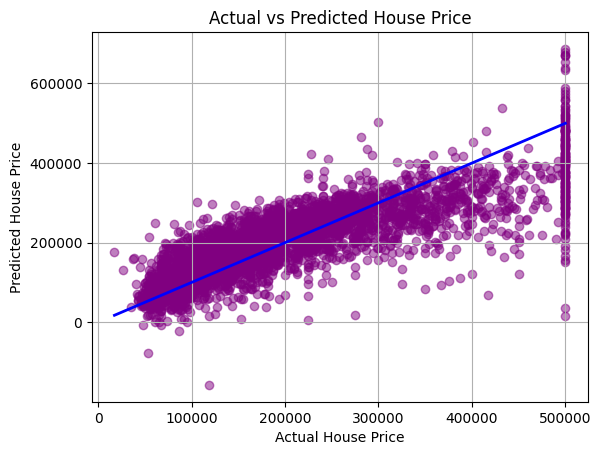

In [46]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred_reg=regressor.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_reg, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=2)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Price")
plt.grid(True)
plt.show()

In [53]:
# Models to compare
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(random_state=42)
}

# Evaluate
from sklearn.metrics import mean_squared_error
for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    print(f"{name}: RMSE = {rmse:.2f}")

Linear Regression: RMSE = 68203.01
Random Forest: RMSE = 49261.91
Gradient Boosting: RMSE = 54907.73
Hist Gradient Boosting: RMSE = 47752.00


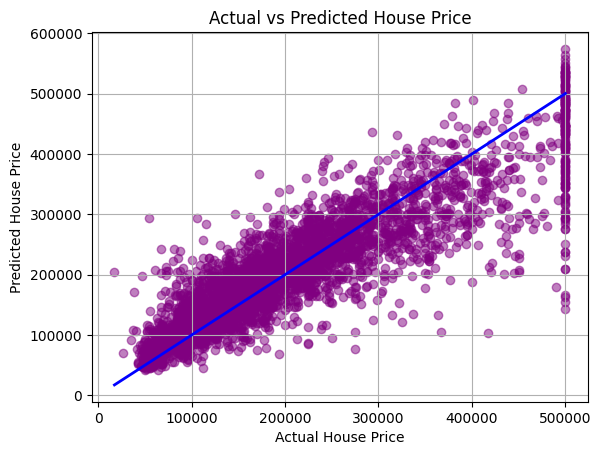

In [55]:

hist_gradient=GradientBoostingRegressor(random_state=50)
hist_gradient.fit(x_train,y_train)
y_pred_hist=hist_gradient.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_hist , color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=2)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Price")
plt.grid(True)
plt.show()